In [388]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import tree

In [389]:
# get data
preprocessed_data = pd.read_csv("train.csv")

In [390]:
preprocessed_data.shape

(891, 12)

In [391]:
preprocessed_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [392]:
# Nan values and extra info are problems
preprocessed_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [393]:
def process_data(data):
    # delete shit columns
    result = data.drop(labels=['Name', 'Ticket', 'PassengerId', 'Cabin'], axis=1)
    
    def to_int(x: bool): return 1 if x else 0

    # transform to int boolean or enum columns
    result = pd.get_dummies(result)
    
    # fix Nan data
    mean_age = result.mean()['Age']
    result['Age'] = result['Age'].fillna(mean_age)
    
    mean_fare = result.mean()['Fare']
    result['Fare'] = result['Fare'].fillna(mean_fare)
    
    return result

In [394]:
train_data = process_data(preprocessed_data)

In [395]:
# Check if Nan problem is fixed
train_data.isna().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [396]:
# Try to choose correctly a ml model
train_data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,0.543351,-0.543351,0.168240,0.003650,-0.155660
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,-0.131900,0.131900,-0.243292,0.221009,0.081720
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,-0.084153,0.084153,0.032024,-0.013855,-0.027121
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,0.114631,-0.114631,-0.059528,-0.026354,0.070941
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,0.245489,-0.245489,-0.011069,-0.081228,0.063036
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,0.182333,-0.182333,0.269335,-0.117216,-0.166603
Sex_female,0.543351,-0.131900,-0.084153,0.114631,0.245489,0.182333,1.000000,-1.000000,0.082853,0.074115,-0.125722
Sex_male,-0.543351,0.131900,0.084153,-0.114631,-0.245489,-0.182333,-1.000000,1.000000,-0.082853,-0.074115,0.125722
Embarked_C,0.168240,-0.243292,0.032024,-0.059528,-0.011069,0.269335,0.082853,-0.082853,1.000000,-0.148258,-0.778359
Embarked_Q,0.003650,0.221009,-0.013855,-0.026354,-0.081228,-0.117216,0.074115,-0.074115,-0.148258,1.000000,-0.496624


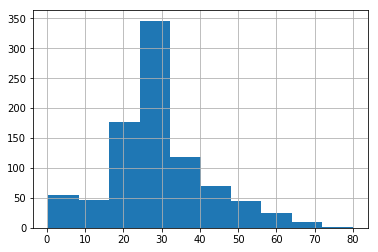

In [397]:
train_data.Age.hist()

In [398]:
train_data.dtypes

Survived        int64
Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Sex_female      uint8
Sex_male        uint8
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

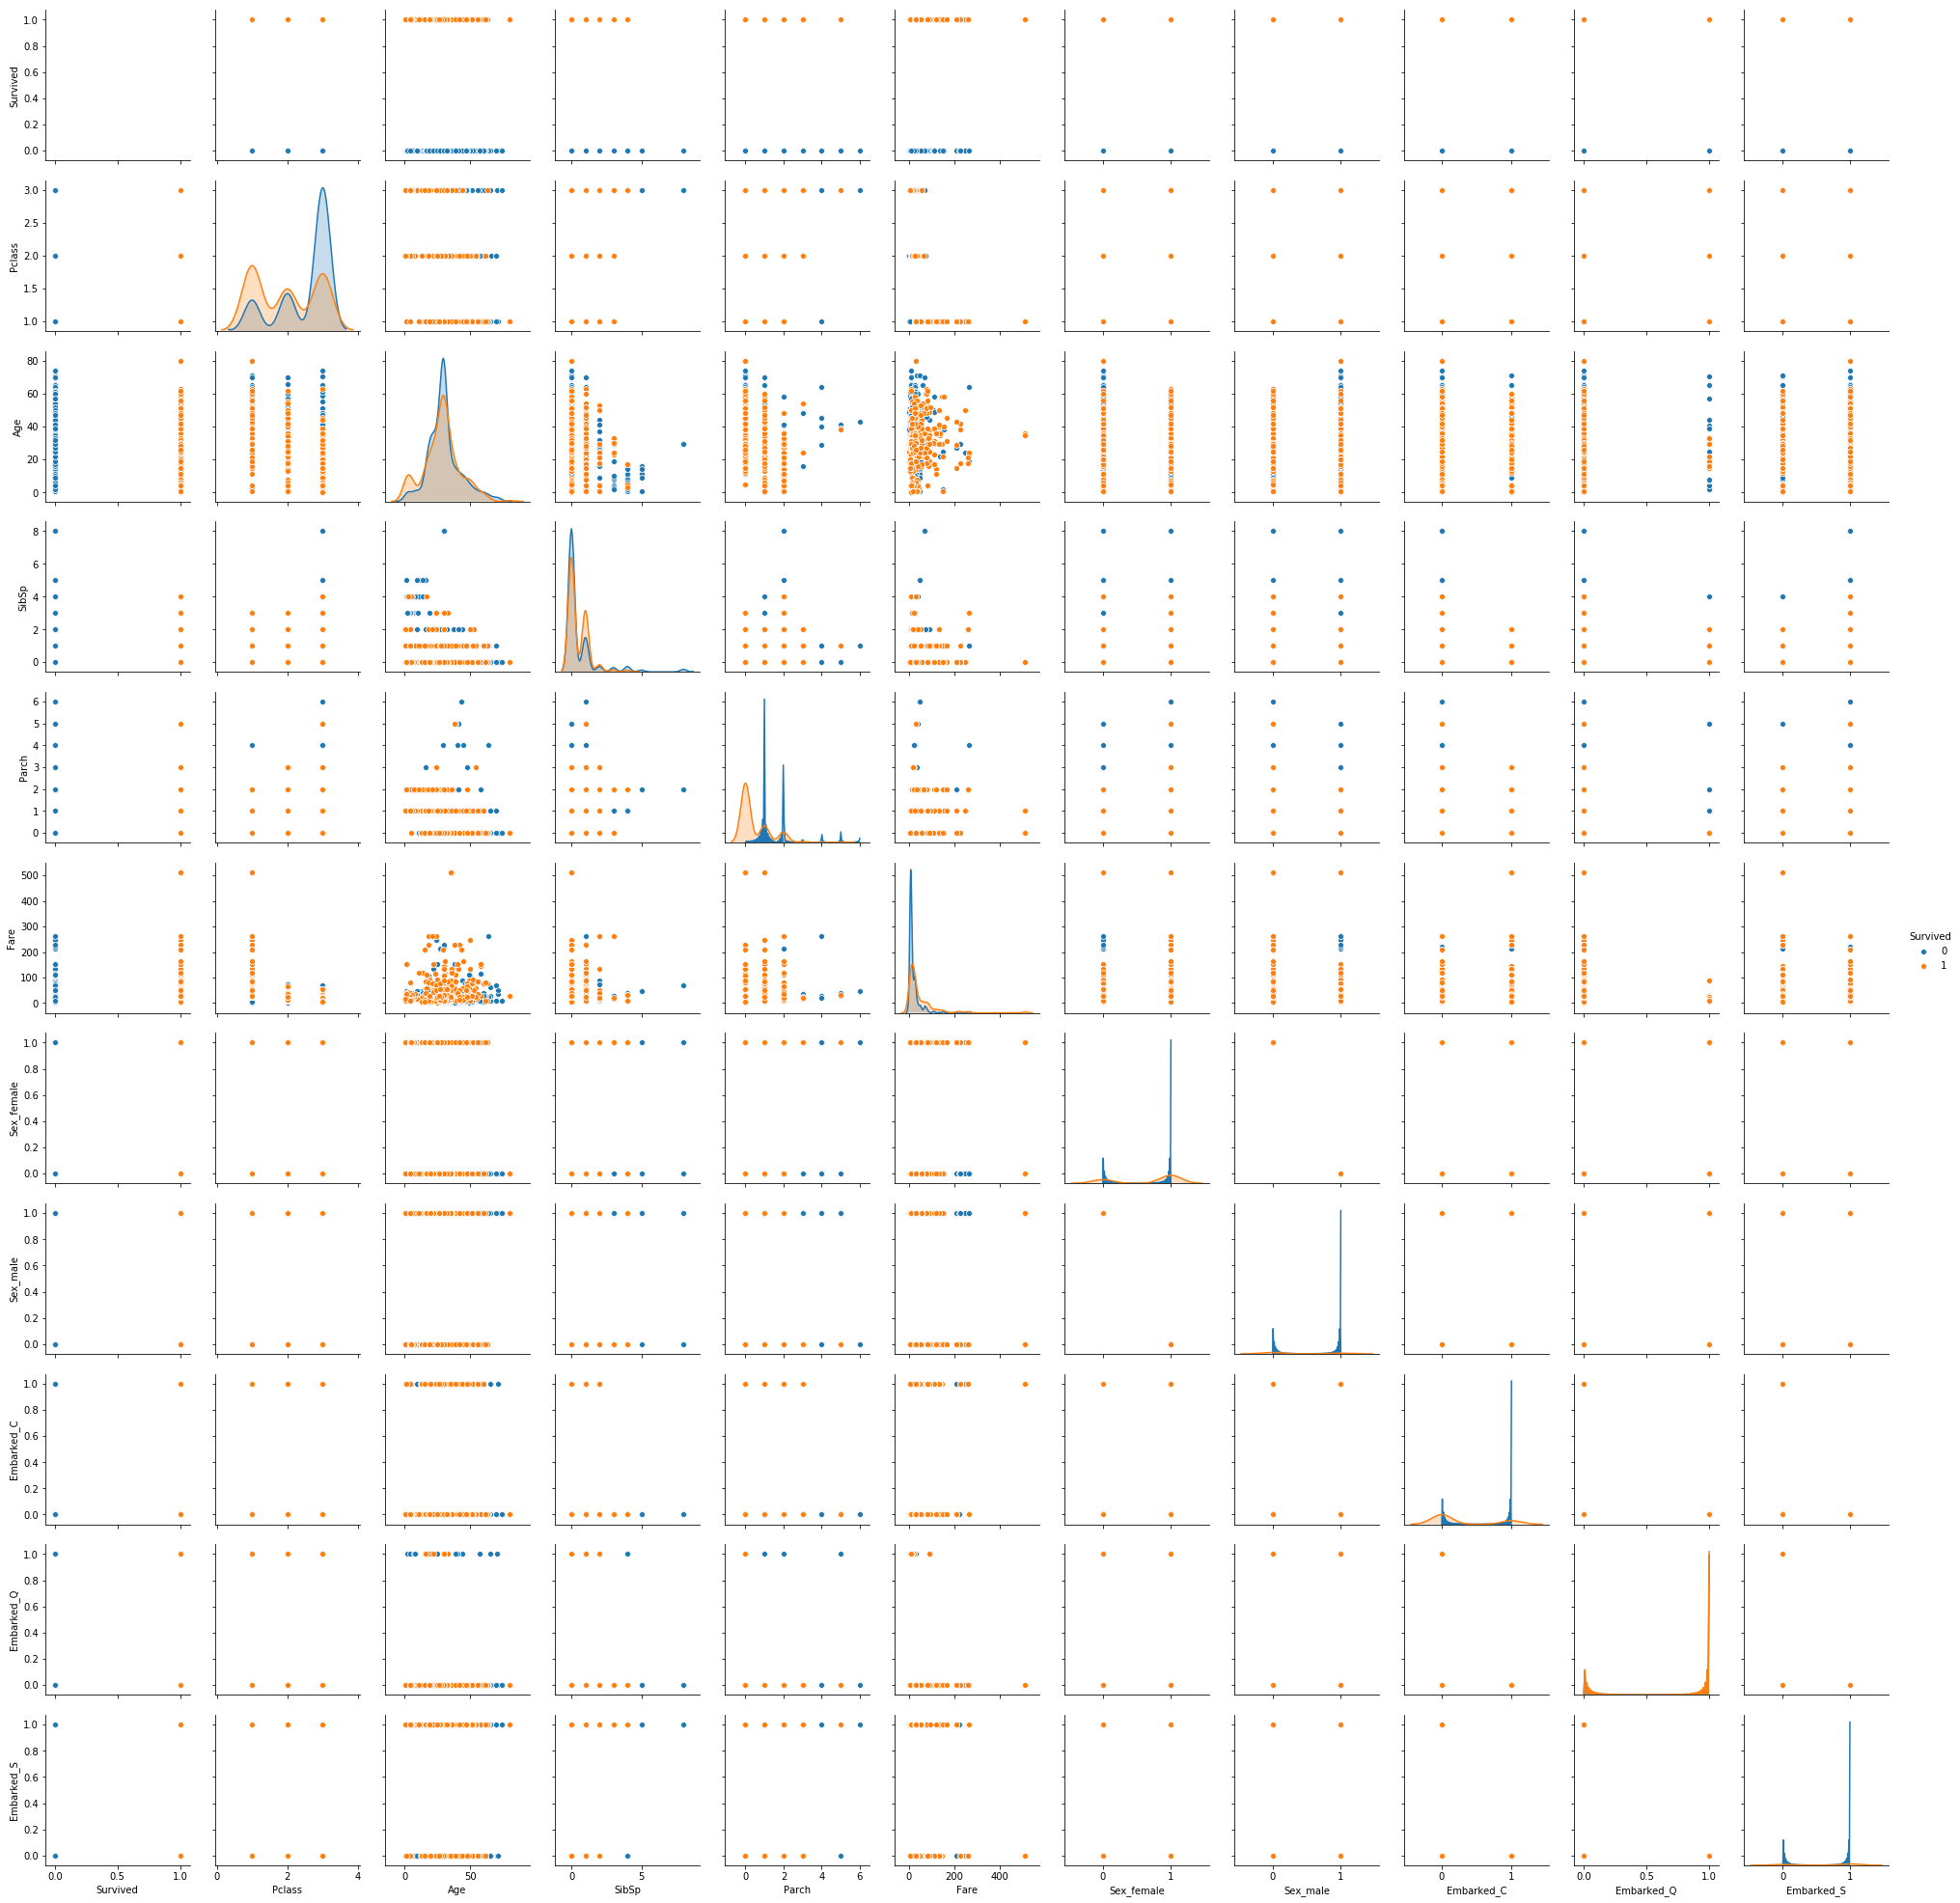

In [399]:
sns.pairplot(train_data, hue="Survived")

In [400]:
train_data.shape

(891, 11)

In [408]:
# Train decision tree, cause linear regression isn't the best variant, k means too
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    train_data.drop(labels=['Survived'], axis=1),
    train_data['Survived'],
    test_size = 0.2,
    random_state=1337
)


In [418]:
classifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
classifier = classifier.fit(X_train, Y_train)

In [419]:
classifier.score(X_test, Y_test)

0.8324022346368715

In [420]:
test_data = pd.read_csv("test.csv")

In [421]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [422]:
processed_test_data = process_data(test_data)

In [423]:
processed_test_data.isna().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [424]:
predicted_survived = pd.Series(classifier.predict(processed_test_data))

In [425]:
submission = pd.DataFrame({"PassengerId" : test_data["PassengerId"], "Survived" : predicted_survived})

In [426]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [427]:
submission.to_csv("submission.csv", index=False)